# Introduction to Kernel Customer Segmentation in Python

## Task 4: Kernel Principal Component Analysis
Let's go over some [KPCA theory](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), and see see if it works better than standard PCA.

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import KernelPCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [2]:
df = pd.read_csv('Data/data_processed.csv', index_col=0)
data = np.load('Data/training_data.npy')

## Polynomial Function

In [5]:
kpca=KernelPCA(n_components=2, kernel="poly", degree=2)
res_kpca_poly=kpca.fit_transform(data)

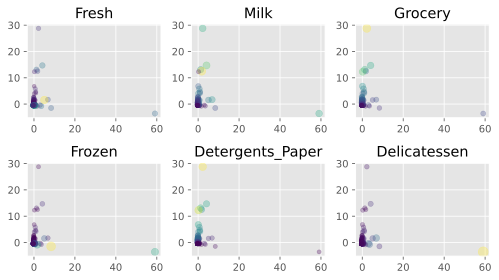

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+5*data[:, features.index(feature)]
    ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

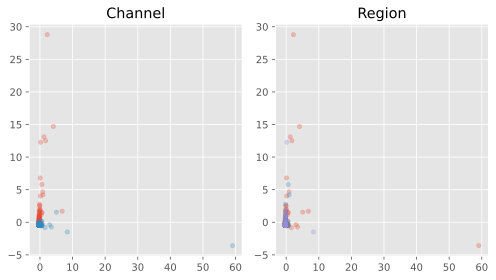

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):  # categorical variables
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_poly[df[feature]==unique_val, 0], res_kpca_poly[df[feature]==unique_val, 1], s=20, alpha=0.3)
    ax.set_title(feature)
plt.tight_layout()

## Radial Basis Function

In [14]:
kpca=KernelPCA(n_components=2, kernel="rbf", gamma=0.01)
res_kpca_rbf=kpca.fit_transform(data)

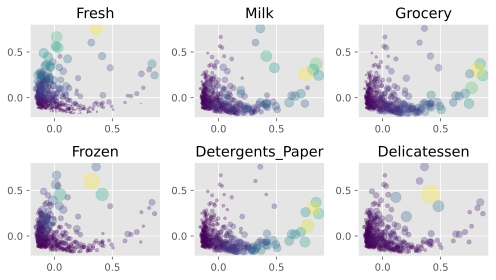

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

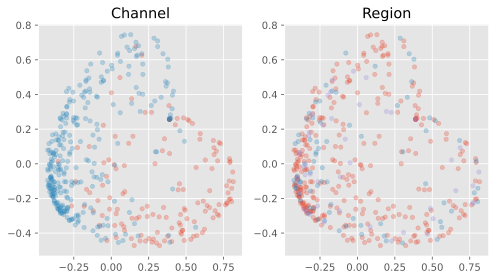

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_rbf[df[feature]==unique_val, 0], res_kpca_rbf[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Cosine Function

In [17]:
kpca=KernelPCA(n_components=2, kernel="cosine")
res_kpca_cos=kpca.fit_transform(data)

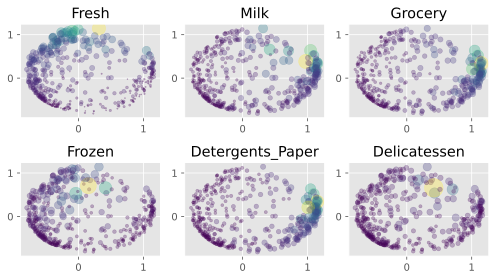

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_cos[:, 0], res_kpca_cos[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

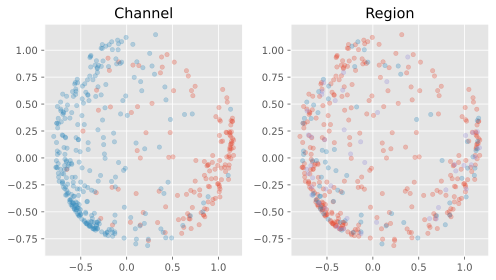

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_cos[df[feature]==unique_val, 0], res_kpca_cos[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Append to DataFrame

In [21]:
df['x_kpca_poly'] = res_kpca_poly[:, 0]
df['y_kpca_poly'] = res_kpca_poly[:, 1]

df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

df['x_kpca_cos'] = res_kpca_cos[:, 0]
df['y_kpca_cos'] = res_kpca_cos[:, 1]

In [22]:
df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0  Retail  Other  12669  9656     7561     214              2674   
1  Retail  Other   7057  9810     9568    1762              3293   
2  Retail  Other   6353  8808     7684    2405              3516   
3  HoReCa  Other  13265  1196     4221    6404               507   
4  Retail  Other  22615  5410     7198    3915              1777   

   Delicatessen  x_kpca_poly  y_kpca_poly  x_kpca_rbf  y_kpca_rbf  x_kpca_cos  \
0          1338    -0.298146    -0.307672    0.019291   -0.043521    0.504789   
1          1776    -0.272613    -0.248762    0.051053   -0.072161    0.889941   
2          7844     0.557870    -0.356102    0.085747    0.005375    0.473994   
3          1788    -0.263419    -0.454023   -0.108671    0.061805   -0.618611   
4          5185     0.126922    -0.432733   -0.010585    0.130396    0.068900   

   y_kpca_cos  
0    0.009622  
1   -0.262833  
2    0.235687  
3    0.370131  
4    0.861829

In [24]:
df.to_csv("Data/data_with_latent.csv")